In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import csv file and put in a data frame
filepath = "../data/clean_data/full_vehicle_data.csv"

ev_df = pd.read_csv(filepath)

ev_df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Latitude,Longitude
0,1GCDE14HXV,Snohomish,Marysville,WA,98270,1997,CHEVROLET,S-10 PICKUP,Battery Electric Vehicle (BEV),39,48.055420,-122.176730
1,1FTZR1078W,Clallam,Sequim,WA,98382,1998,FORD,RANGER,Battery Electric Vehicle (BEV),58,48.081250,-123.105015
2,1FTZR0812X,Skagit,Mount Vernon,WA,98274,1999,FORD,RANGER,Battery Electric Vehicle (BEV),74,48.412875,-122.288178
3,1FTZR0812X,Pierce,Graham,WA,98338,1999,FORD,RANGER,Battery Electric Vehicle (BEV),74,47.076396,-122.295340
4,1FTZR0813X,Pierce,Graham,WA,98338,1999,FORD,RANGER,Battery Electric Vehicle (BEV),74,47.076396,-122.295340


In [3]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181055 entries, 0 to 181054
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             181055 non-null  object 
 1   County                 181055 non-null  object 
 2   City                   181055 non-null  object 
 3   State                  181055 non-null  object 
 4   Postal Code            181055 non-null  int64  
 5   Model Year             181055 non-null  int64  
 6   Make                   181055 non-null  object 
 7   Model                  181055 non-null  object 
 8   Electric Vehicle Type  181055 non-null  object 
 9   Electric Range         181055 non-null  int64  
 10  Latitude               181055 non-null  float64
 11  Longitude              181055 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 16.6+ MB


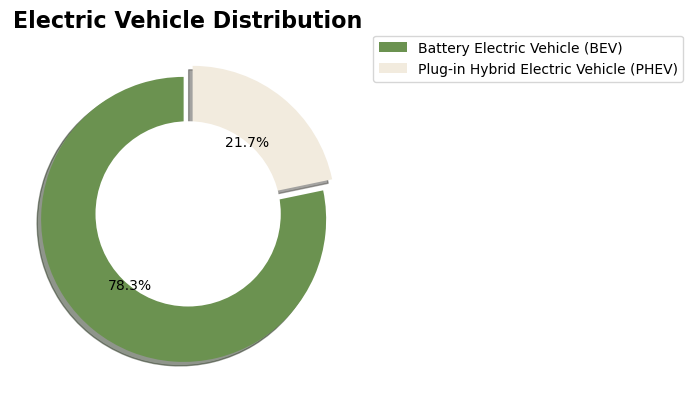

In [4]:
#Distributions of the data 

# The values of each section of the pie chart
values = ev_df["Electric Vehicle Type"].value_counts()
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]

# Create the pie chart

values.plot(kind='pie', colors = colors, explode=[0.05, 0.05], shadow=True, autopct='%1.1f%%', 
            legend = True, labeldistance=None, ylabel='',startangle=90)
plt.title("Electric Vehicle Distribution", fontsize=16, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.tight_layout()
plt.savefig("images/EV_Data_Distribution.png")




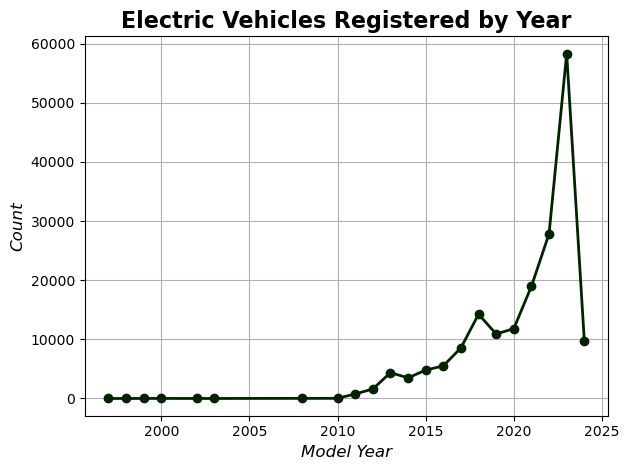

In [5]:
#cars registration by years (make)
cars_years = ev_df.groupby('Model Year').size()
colors = ['#022200','#6B9250', '#F2EBDE', '#D6CFEE', "#E7E900"]
cars_years.plot(kind='line', marker="o",color= colors, linewidth=2, grid = True, linestyle = '-')
plt.title("Electric Vehicles Registered by Year", fontsize=16, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontstyle="italic")
plt.xlabel("Model Year", fontsize=12, fontstyle="italic")
plt.tight_layout()
plt.savefig("images/EV_Registered_by_Year.png")


In [6]:
#create a pivot table to show the vehicle distribution by make 

make_pv = ev_df.pivot_table(index='Make', aggfunc='size')
make_pv.sort_values(ascending = False)




Make
TESLA                   80627
NISSAN                  14024
CHEVROLET               13838
FORD                     9503
BMW                      7666
KIA                      7632
TOYOTA                   6485
VOLKSWAGEN               5153
JEEP                     4678
HYUNDAI                  4552
RIVIAN                   4419
VOLVO                    4278
AUDI                     3729
CHRYSLER                 3039
MERCEDES-BENZ            1646
PORSCHE                  1157
MITSUBISHI                979
MINI                      925
POLESTAR                  894
SUBARU                    837
HONDA                     834
FIAT                      783
DODGE                     607
MAZDA                     506
CADILLAC                  432
LEXUS                     398
SMART                     269
LINCOLN                   269
LUCID                     238
JAGUAR                    236
GENESIS                   189
FISKER                    111
LAND ROVER                 57
ALFA 

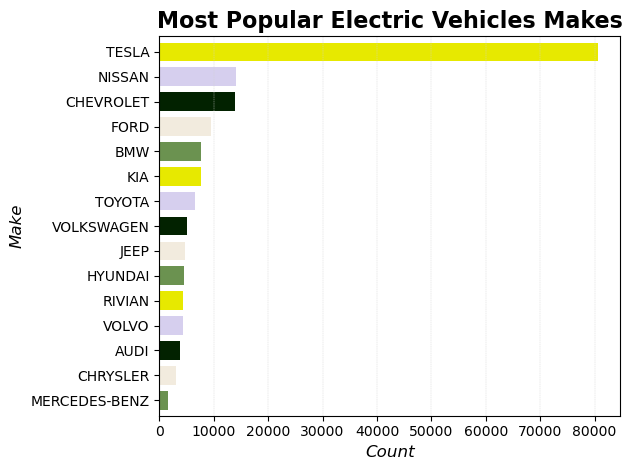

In [7]:
#most popular cars registration (make)
make_dist = ev_df["Make"].value_counts()
make_dist = make_dist.sort_values().tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

make_dist.plot.barh(width=0.75,  color=colors)
plt.title("Most Popular Electric Vehicles Makes", fontsize=16, fontweight="bold")
plt.ylabel("Make", fontsize=12, fontstyle="italic")
plt.xlabel("Count", fontsize=12, fontstyle="italic")
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.tight_layout()
plt.savefig("images/Most_Popular_EV_Makes.png")
plt.show()


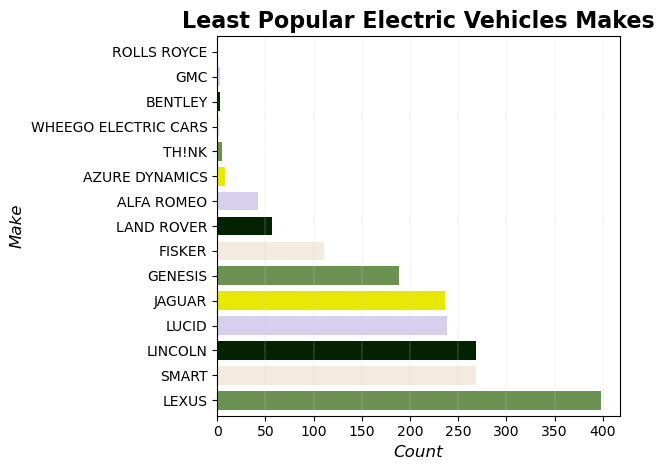

In [8]:
#least popular cars registration (make)
make_dist = ev_df["Make"].value_counts()
make_dist = make_dist.tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

make_dist.plot.barh(width=0.75,   color=colors)
plt.title("Least Popular Electric Vehicles Makes", fontsize=16, fontweight="bold")
plt.ylabel("Make", fontsize=12, fontstyle="italic")
plt.xlabel("Count", fontsize=12, fontstyle="italic")
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.tight_layout()
plt.savefig("images/Least_Popular_EV_Makes.png")
plt.show()



In [9]:
#create a pivot table to show the vehicle distribution by model
pivot_table = ev_df.pivot_table(index='Model', aggfunc='size')
pivot_table.sort_values(ascending = False)


Model
MODEL Y        36937
MODEL 3        30065
LEAF           13343
MODEL S         7706
BOLT EV         6925
               ...  
918                1
750E               1
S-10 PICKUP        1
SPECTRE            1
CYBERTRUCK         1
Length: 143, dtype: int64

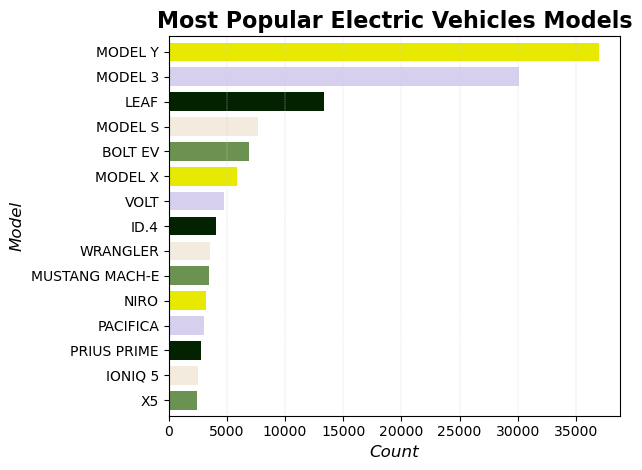

In [10]:
#most popular cars registration (model)
model_dist = ev_df["Model"].value_counts()
model_dist = model_dist.sort_values().tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

model_dist.plot.barh(width=0.75,   color=colors)
plt.title("Most Popular Electric Vehicles Models", fontsize=16, fontweight="bold")
plt.ylabel("Model", fontsize=12, fontstyle="italic")
plt.xlabel("Count", fontsize=12, fontstyle="italic")
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.tight_layout()
plt.savefig("images/Most_Popular_EV_Models.png")
plt.show()


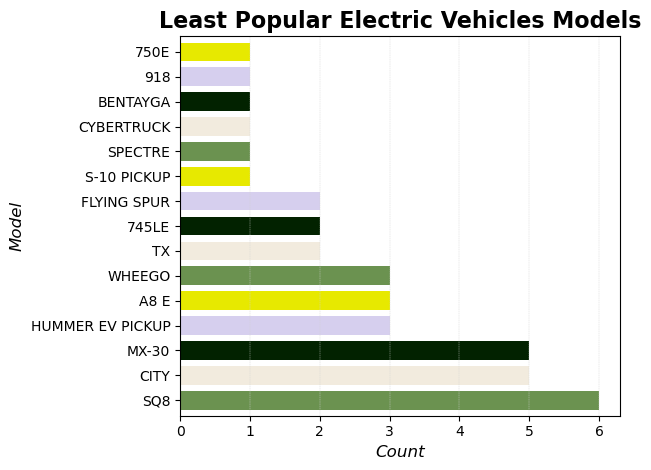

In [11]:
#least popular cars registration (make)
model_dist = ev_df["Model"].value_counts()
model_dist = model_dist.tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

model_dist.plot.barh(width=0.75, color=colors)
plt.title("Least Popular Electric Vehicles Models", fontsize=16, fontweight="bold")
plt.ylabel("Model", fontsize=12, fontstyle="italic")
plt.xlabel("Count", fontsize=12, fontstyle="italic")
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.tight_layout()
plt.savefig("images/Least_Popular_EV_Models .png")
plt.show()
